In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix,roc_curve,roc_auc_score


import warnings
warnings.filterwarnings('ignore')


In [76]:
data = pd.read_csv('diabetes.csv')

In [77]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


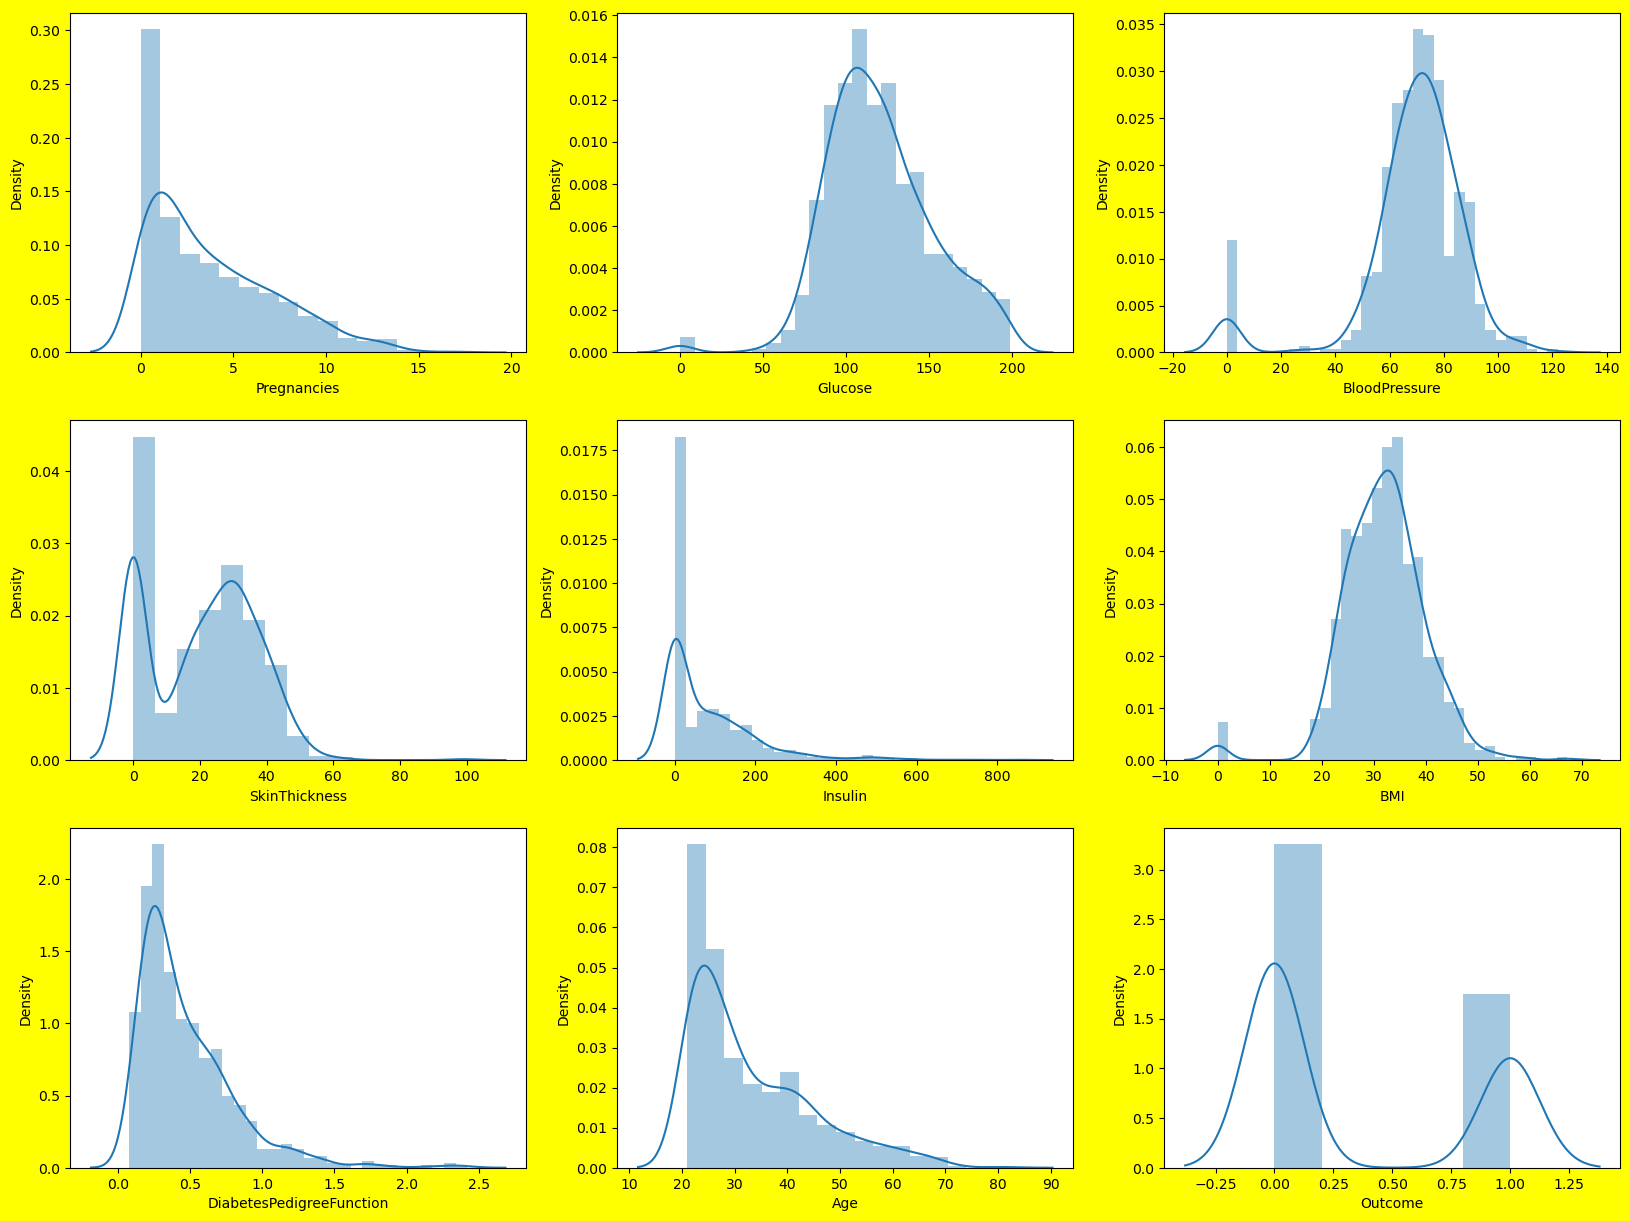

In [79]:
plt.figure(figsize=(20,15), facecolor = 'yellow')
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(data[column])
        
    plotnumber+=1
    
plt.show()    
    

In [80]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

In [81]:
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())

data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())



In [82]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


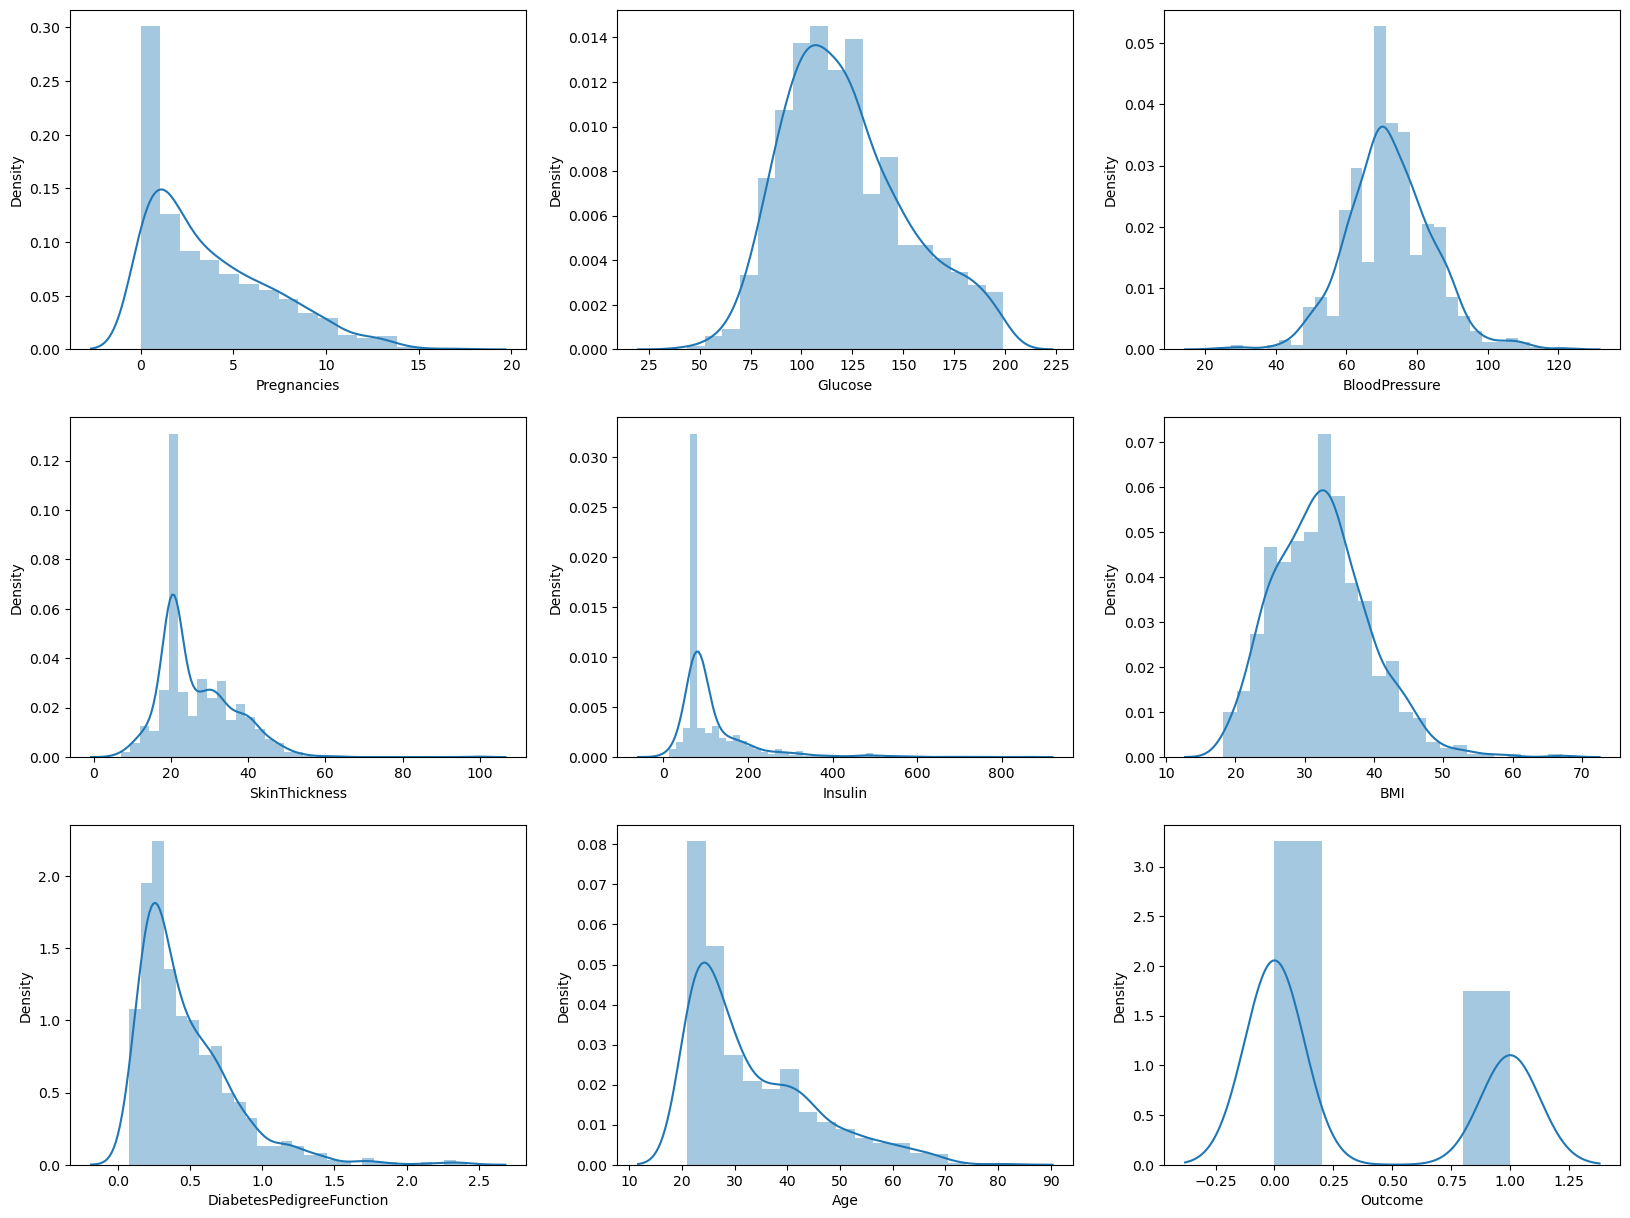

In [83]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(data[column]) 
        
    plotnumber+=1
    
plt.show()    

In [84]:
feature = data.drop('Outcome', axis = 1)

In [85]:
plt.figure(figsize=(20,25))
graph = 1

for column in featur
e:
    if graph <= 9:
        plt.subplot(3,3,graph)
        ax =sns.boxplot(data= feature[column])
    graph +=1 
    
plt.show()    

SyntaxError: invalid syntax (936145929.py, line 4)

In [86]:
q1 = data.quantile(0.25)

q3 = data.quantile(0.75)

iqr = q3-q1

In [87]:
iqr

Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness               11.463542
Insulin                     47.450521
BMI                          9.100000
DiabetesPedigreeFunction     0.382500
Age                         17.000000
Outcome                      1.000000
dtype: float64

In [88]:
preg = (q3.Pregnancies + (1.5 * iqr.Pregnancies))

In [89]:
preg

13.5

In [90]:
abc = np.where(feature['Pregnancies'] > preg)
abc

(array([ 88, 159, 298, 455], dtype=int64),)

In [91]:
data = feature.drop(feature.index[abc])


In [92]:
feature.shape

(768, 8)

In [93]:
feature.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...,...
763,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [94]:
bp_high = (q3.BloodPressure + (1.5 * iqr.BloodPressure))

abc = np.where(feature['BloodPressure'] > bp_high)

feature = feature.drop(feature.index[abc])
feature.shape

feature.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...,...
753,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
754,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
755,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
756,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [95]:
bp_low =(q1.BloodPressure - (1.5 * iqr.BloodPressure))
print(bp_low)
 
          
aa = np.where(feature['BloodPressure'] > bp_low) 
          
feature = feature.drop(feature.index[aa])
print(feature.shape)
       
feature.reset_index()          

40.0
(5, 8)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
1,18,1,103.0,30.0,38.0,83.0,43.3,0.183,33
2,125,1,88.0,30.0,42.0,99.0,55.0,0.496,26
3,597,1,89.0,24.0,19.0,25.0,27.8,0.559,21
4,599,1,109.0,38.0,18.0,120.0,23.1,0.407,26


In [96]:
feature.shape

(5, 8)

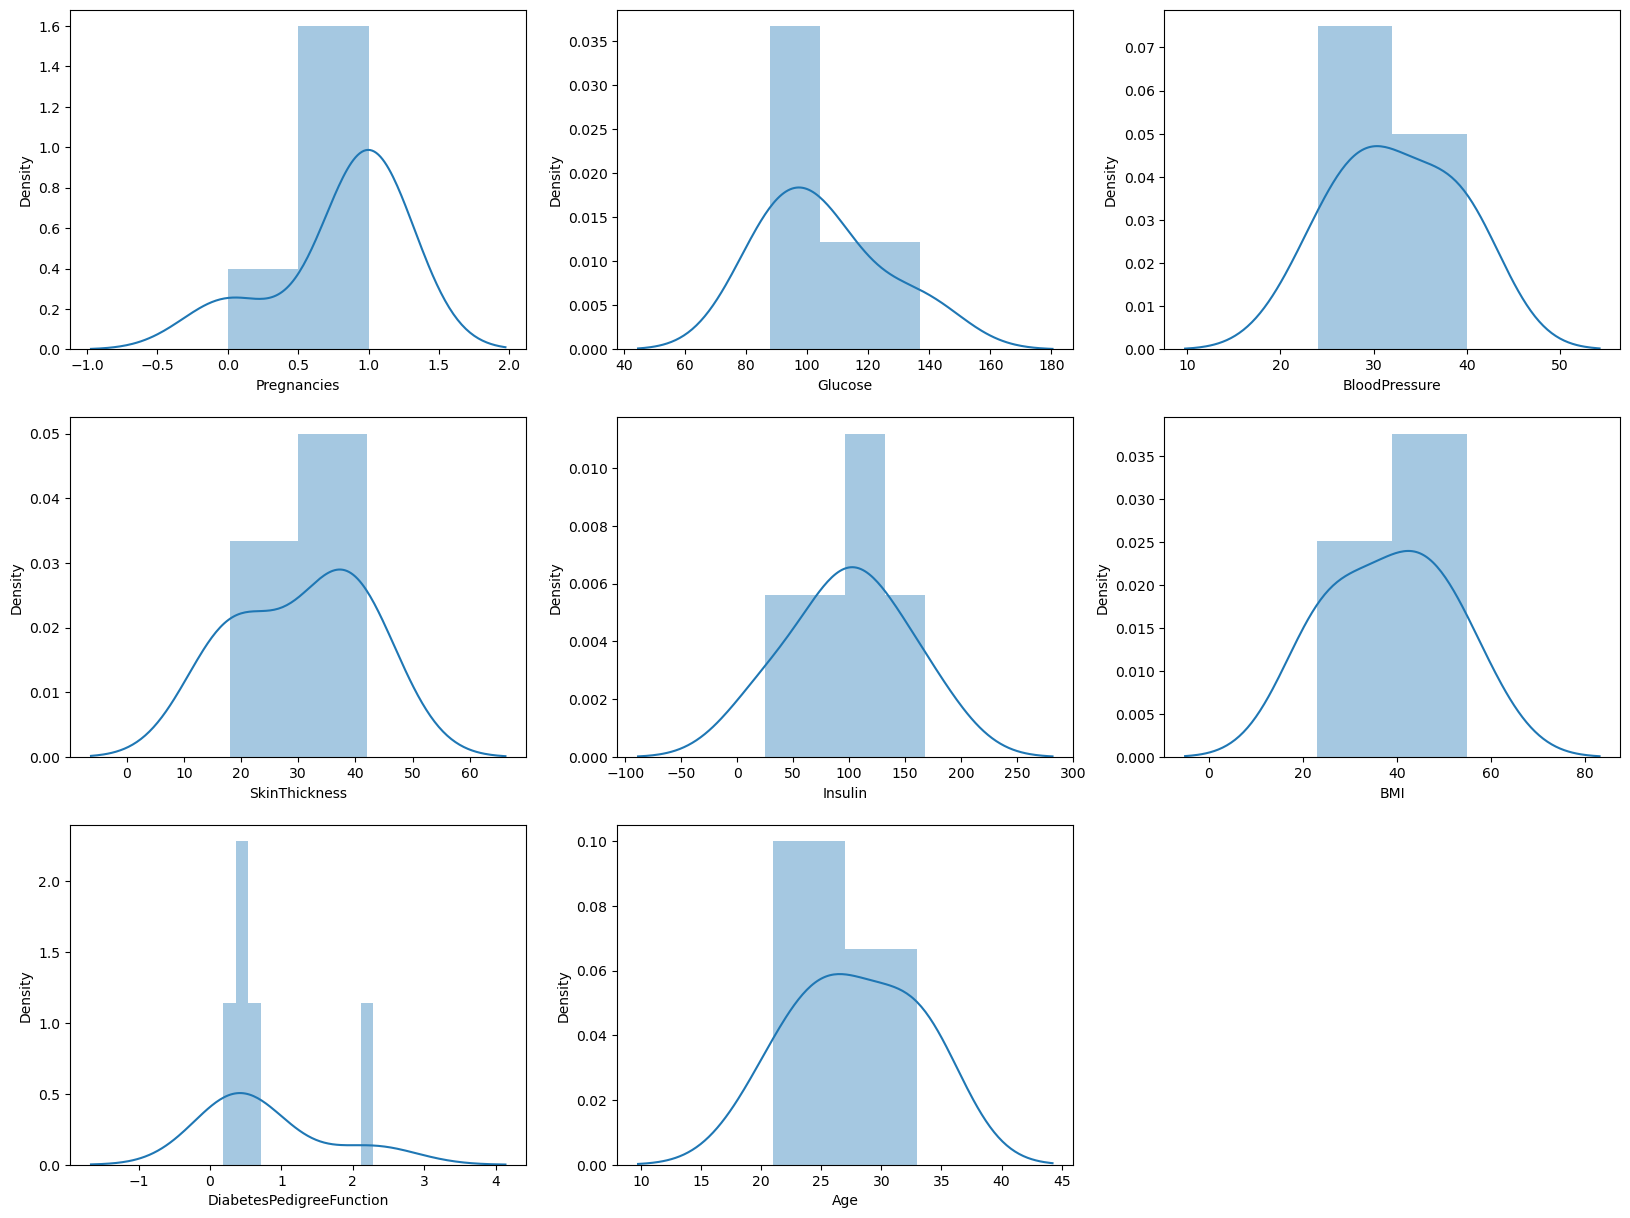

In [97]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in feature:
    if plotnumber<=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(feature[column])
        
    plotnumber+=1
    
plt.show()    

In [98]:
feature.shape

(5, 8)

In [107]:
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes_up_down.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,0


In [110]:
from collections import Counter

In [112]:
Counter(df['Outcome'])

Counter({0: 720, 1: 48})

In [113]:
x = df.drop('Outcome',axis = 1)
y = df.Outcome

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x, y , random_state=42,train_size=0.75)


In [116]:
Counter(y_train)

Counter({0: 539, 1: 37})

In [133]:
from imblearn.over_sampling import SMOTE

In [136]:
from imblearn.under_sampling import NearMiss

In [138]:
ove_samp = NearMiss(0.75)

TypeError: __init__() takes 1 positional argument but 2 were given

In [139]:
ove_samp = SMOTE(0.75)

TypeError: __init__() takes 1 positional argument but 2 were given